<a href="https://colab.research.google.com/github/Homagn/colabs/blob/main/segmentation_finetuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab shows how to use ***mlfactory*** to easily finetune deeplabv3 for general binary semantic segmentation

In [1]:
!pip install mlfactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 4.6 MB/s eta 0:00:00


Lets download a small dataset for segmenting single foodpackets held in hand by a person

In [4]:
!pip install gdown
import sys,os
os.system("gdown --id 1za8Zn5-yiScrc4y-3Jl6U8mhGEmLWFIz")
os.system("unzip food_packet.zip -d"+"food_packet")
print("done extracting !")
os.system("rm -rf food_packet.zip")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
done extracting !


0

Now you can see in your workspace that food_packet/food_packet/Images/ has sample images of a foot packet been held at hand and food_packet/food_packet/Masks/ has the same images annotated as binary masks segmenting the food packet in the images

Now we will define a simple training loop and obtain fine tuned network

In [6]:
from pathlib import Path

import torch
from sklearn.metrics import f1_score, roc_auc_score
from torch.utils import data
import sys,os


from mlfactory.models.pytorch.deeplabv3 import createDeepLabv3
from mlfactory.dataloaders.binary_seg_general import datahandler
from mlfactory.trainers.pytorch.train_seg2 import train_model


batch_size = 4
epochs = 25
exp_directory = 'exp'
data_directory = 'food_packet/food_packet'

def main(data_directory, exp_directory, epochs, batch_size):
    # Create the deeplabv3 resnet101 model which is pretrained on a subset
    # of COCO train2017, on the 20 categories that are present in the Pascal VOC dataset.
    model = createDeepLabv3()
    model.train()
    data_directory = Path(data_directory)
    # Create the experiment directory if not present
    exp_directory = Path(exp_directory)
    if not exp_directory.exists():
        exp_directory.mkdir()

    # Specify the loss function
    criterion = torch.nn.MSELoss(reduction='mean')
    # Specify the optimizer with a lower learning rate
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    # Specify the evaluation metrics
    metrics = {'f1_score': f1_score, 'auroc': roc_auc_score}

    # Create the dataloader
    dataloaders = datahandler.get_dataloader_single_folder(
        data_directory, batch_size=batch_size)
    _ = train_model(model,
                    criterion,
                    dataloaders,
                    optimizer,
                    bpath=exp_directory,
                    metrics=metrics,
                    num_epochs=epochs)

    # Save the trained model
    torch.save(model, exp_directory / 'weights.pt')



main(data_directory, exp_directory, epochs, batch_size)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/25
----------


100%|██████████| 17/17 [00:30<00:00,  1.80s/it]


Train Loss: 0.0673


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

Test Loss: 0.0774
{'epoch': 1, 'Train_loss': 0.06727594137191772, 'Test_loss': 0.07742267847061157, 'Train_f1_score': 0.3671520530537124, 'Train_auroc': 0.8451017186233182, 'Test_f1_score': 0.6309903838305296, 'Test_auroc': 0.7929640164412731}
Epoch 2/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:22<00:00,  1.33s/it]


Train Loss: 0.0402


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

Test Loss: 0.0276
{'epoch': 2, 'Train_loss': 0.04021201655268669, 'Test_loss': 0.027614053338766098, 'Train_f1_score': 0.5411806814374434, 'Train_auroc': 0.9306188074225042, 'Test_f1_score': 0.6871286877540914, 'Test_auroc': 0.7976505093509471}
Epoch 3/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:23<00:00,  1.35s/it]


Train Loss: 0.0325


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

Test Loss: 0.0618
{'epoch': 3, 'Train_loss': 0.0325152650475502, 'Test_loss': 0.06181837245821953, 'Train_f1_score': 0.5723343711220232, 'Train_auroc': 0.9398692529797719, 'Test_f1_score': 0.7436260377702286, 'Test_auroc': 0.7958482568249698}
Epoch 4/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:23<00:00,  1.38s/it]


Train Loss: 0.0256


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

Test Loss: 0.0306
{'epoch': 4, 'Train_loss': 0.025595370680093765, 'Test_loss': 0.03064708411693573, 'Train_f1_score': 0.5913332539034633, 'Train_auroc': 0.9417936938956064, 'Test_f1_score': 0.7423689082931999, 'Test_auroc': 0.7988053649222959}
Epoch 5/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:23<00:00,  1.38s/it]


Train Loss: 0.0200


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

Test Loss: 0.0128
{'epoch': 5, 'Train_loss': 0.019983874633908272, 'Test_loss': 0.012811433523893356, 'Train_f1_score': 0.6450217372015313, 'Train_auroc': 0.943087359411543, 'Test_f1_score': 0.7347044550185035, 'Test_auroc': 0.7992830601693426}
Epoch 6/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.43s/it]


Train Loss: 0.0146


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

Test Loss: 0.0162
{'epoch': 6, 'Train_loss': 0.014589071273803711, 'Test_loss': 0.016219858080148697, 'Train_f1_score': 0.6372789612853555, 'Train_auroc': 0.9435369547516375, 'Test_f1_score': 0.7431436137835027, 'Test_auroc': 0.7992579669044444}
Epoch 7/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:25<00:00,  1.48s/it]


Train Loss: 0.0132


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

Test Loss: 0.0126
{'epoch': 7, 'Train_loss': 0.013151965104043484, 'Test_loss': 0.012617259286344051, 'Train_f1_score': 0.7070537749315429, 'Train_auroc': 0.943687810802176, 'Test_f1_score': 0.7440518839702011, 'Test_auroc': 0.799422039239081}
Epoch 8/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.46s/it]


Train Loss: 0.0127


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

Test Loss: 0.0087
{'epoch': 8, 'Train_loss': 0.012735051102936268, 'Test_loss': 0.008660716004669666, 'Train_f1_score': 0.7279570855285832, 'Train_auroc': 0.9438966617336079, 'Test_f1_score': 0.7491152604641877, 'Test_auroc': 0.7993157492434441}
Epoch 9/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.43s/it]


Train Loss: 0.0114


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.33it/s]

Test Loss: 0.0106
{'epoch': 9, 'Train_loss': 0.01142777968198061, 'Test_loss': 0.010625836439430714, 'Train_f1_score': 0.7238440462763477, 'Train_auroc': 0.9440356901383549, 'Test_f1_score': 0.7517995057220219, 'Test_auroc': 0.7993052465246466}
Epoch 10/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.44s/it]


Train Loss: 0.0093


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

Test Loss: 0.0077
{'epoch': 10, 'Train_loss': 0.00933467224240303, 'Test_loss': 0.00768950954079628, 'Train_f1_score': 0.7706632344474572, 'Train_auroc': 0.9440652337870739, 'Test_f1_score': 0.752484968800205, 'Test_auroc': 0.7994585942193402}
Epoch 11/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.44s/it]


Train Loss: 0.0097


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

Test Loss: 0.0091
{'epoch': 11, 'Train_loss': 0.00969344936311245, 'Test_loss': 0.009130103513598442, 'Train_f1_score': 0.7385328184001589, 'Train_auroc': 0.944104765078463, 'Test_f1_score': 0.7472031925685675, 'Test_auroc': 0.7995697722034933}
Epoch 12/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.43s/it]


Train Loss: 0.0079


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

Test Loss: 0.0092
{'epoch': 12, 'Train_loss': 0.007871292531490326, 'Test_loss': 0.009218848310410976, 'Train_f1_score': 0.7876486042532282, 'Train_auroc': 0.9441637591308975, 'Test_f1_score': 0.7549120506018189, 'Test_auroc': 0.7992845790429396}
Epoch 13/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.46s/it]


Train Loss: 0.0085


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

Test Loss: 0.0058
{'epoch': 13, 'Train_loss': 0.00853030662983656, 'Test_loss': 0.005823573563247919, 'Train_f1_score': 0.8185684535423028, 'Train_auroc': 0.9441629114573957, 'Test_f1_score': 0.7502877275314366, 'Test_auroc': 0.799462579783861}
Epoch 14/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:25<00:00,  1.49s/it]


Train Loss: 0.0080


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

Test Loss: 0.0051
{'epoch': 14, 'Train_loss': 0.008048590272665024, 'Test_loss': 0.005145973991602659, 'Train_f1_score': 0.8315466238155261, 'Train_auroc': 0.9442196604877466, 'Test_f1_score': 0.7468342575000343, 'Test_auroc': 0.7994478074889966}
Epoch 15/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.47s/it]


Train Loss: 0.0063


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

Test Loss: 0.0088
{'epoch': 15, 'Train_loss': 0.0062945252284407616, 'Test_loss': 0.008756866678595543, 'Train_f1_score': 0.8051025792622322, 'Train_auroc': 0.9442585082418289, 'Test_f1_score': 0.7538956252179045, 'Test_auroc': 0.799322513677603}
Epoch 16/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.43s/it]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0093


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

Test Loss: 0.0084
{'epoch': 16, 'Train_loss': 0.009300214238464832, 'Test_loss': 0.008396759629249573, 'Train_f1_score': 0.8213347166860849, 'Train_auroc': 0.9442385128854285, 'Test_f1_score': 0.7550667012734094, 'Test_auroc': 0.799005062620657}
Epoch 17/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:25<00:00,  1.49s/it]


Train Loss: 0.0077


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

Test Loss: 0.0071
{'epoch': 17, 'Train_loss': 0.007719481363892555, 'Test_loss': 0.0070940409786999226, 'Train_f1_score': 0.86772070715307, 'Train_auroc': 0.9442419571505438, 'Test_f1_score': 0.7496895699959099, 'Test_auroc': 0.7993722727119377}
Epoch 18/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.47s/it]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0075


100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

Test Loss: 0.0065
{'epoch': 18, 'Train_loss': 0.007531970739364624, 'Test_loss': 0.0064865220338106155, 'Train_f1_score': 0.8371515842040812, 'Train_auroc': 0.94426176635869, 'Test_f1_score': 0.7537428689856727, 'Test_auroc': 0.7993826377573563}
Epoch 19/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.46s/it]


Train Loss: 0.0055


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

Test Loss: 0.0090
{'epoch': 19, 'Train_loss': 0.005494433455169201, 'Test_loss': 0.008999220095574856, 'Train_f1_score': 0.8545831882105588, 'Train_auroc': 0.9442337931450646, 'Test_f1_score': 0.7521347836629502, 'Test_auroc': 0.7993754403090718}
Epoch 20/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:25<00:00,  1.49s/it]


Train Loss: 0.0081


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

Test Loss: 0.0060
{'epoch': 20, 'Train_loss': 0.008121555671095848, 'Test_loss': 0.006049272138625383, 'Train_f1_score': 0.8651731380428224, 'Train_auroc': 0.9442834632344932, 'Test_f1_score': 0.7551440430113662, 'Test_auroc': 0.7991669003605614}
Epoch 21/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.47s/it]


Train Loss: 0.0050


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

Test Loss: 0.0049
{'epoch': 21, 'Train_loss': 0.0049678566865623, 'Test_loss': 0.004939615726470947, 'Train_f1_score': 0.8836874091735801, 'Train_auroc': 0.9443008600696664, 'Test_f1_score': 0.7552304411947598, 'Test_auroc': 0.7992656459161033}
Epoch 22/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:25<00:00,  1.48s/it]


Train Loss: 0.0053


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

Test Loss: 0.0046
{'epoch': 22, 'Train_loss': 0.00532970717176795, 'Test_loss': 0.004585226532071829, 'Train_f1_score': 0.8840854194886385, 'Train_auroc': 0.9443105726470851, 'Test_f1_score': 0.7557227028784816, 'Test_auroc': 0.7993438122976911}
Epoch 23/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.46s/it]


Train Loss: 0.0046


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

Test Loss: 0.0079
{'epoch': 23, 'Train_loss': 0.0045846374705433846, 'Test_loss': 0.00787738524377346, 'Train_f1_score': 0.8899063564774242, 'Train_auroc': 0.9443010586789361, 'Test_f1_score': 0.7570235615892298, 'Test_auroc': 0.7991686559792867}
Epoch 24/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:25<00:00,  1.48s/it]

Train Loss: 0.0049



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

Test Loss: 0.0084
{'epoch': 24, 'Train_loss': 0.004887217655777931, 'Test_loss': 0.008426163345575333, 'Train_f1_score': 0.8900149377554047, 'Train_auroc': 0.9443038049399003, 'Test_f1_score': 0.7552894233034971, 'Test_auroc': 0.7993028857507654}
Epoch 25/25
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 17/17 [00:24<00:00,  1.47s/it]


Train Loss: 0.0041


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


Test Loss: 0.0048
{'epoch': 25, 'Train_loss': 0.004055931698530912, 'Test_loss': 0.004842768423259258, 'Train_f1_score': 0.8935424613321907, 'Train_auroc': 0.9443114716326431, 'Test_f1_score': 0.7534688973776106, 'Test_auroc': 0.7993311351398928}
Training complete in 12m 13s
Lowest Loss: 0.004585


Now its time to test the finetuning. Lets first load an image and check it

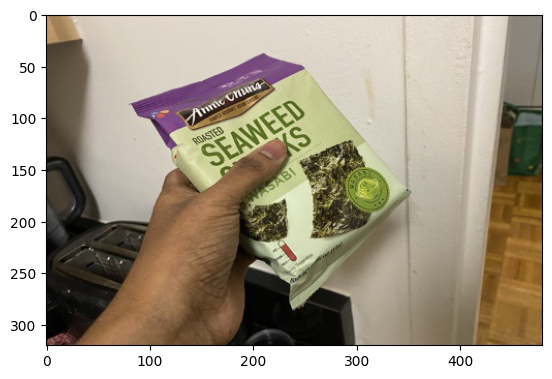

In [7]:
import matplotlib.pyplot as plt
img = plt.imread('food_packet/food_packet/Images/001.jpg')
plt.imshow(img)

Now we will use the segmenter functionality of mlfactory that loads a finetuned segmentation model and can extract masks and rois

In [12]:
from mlfactory.datacreators.nn_seg import segmenter
s = segmenter(loadpath = 'exp/weights.pt', viz = False)

s.run_predictor(f'food_packet/food_packet/Images/'+"001"+'.jpg')
boxes = s.extract_boxes()
#This gives the coordinates of the bounding box for each instance of the segmented object
# format is [ [ topleft x, topleft y, bottom right x, bottom right y ] ]
print("got bounding box annotations ",boxes)

loaded segmentation model 
model pred success 
got bounding box annotations  [[29, 15, 95, 98]]


Finally we can check the mask that the finetuned model predicted as well

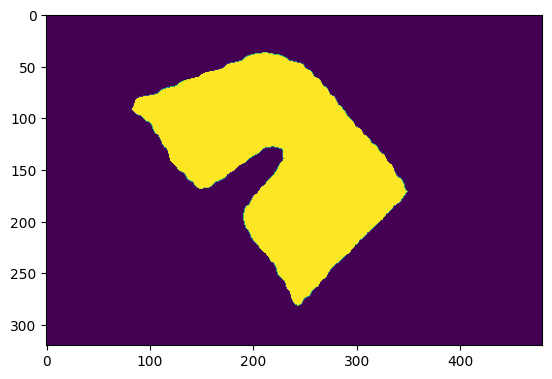

In [13]:
import numpy as np
mask = np.array(s.pred_mask).astype(np.uint8)
plt.imshow(mask)